# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом.
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты.
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты:
1. Описание данных *(с расчетом базовых статистик)*,
2. Исследование зависимостей и формулирование гипотез,
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей,
4. Сравнение качества полученных моделей.

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация.
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ)
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [1]:
### YOUR CODE HERE ###
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.neural_network import MLPClassifier
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, precision_recall_curve, recall_score
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import catboost as cb
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
import xgboost
from imblearn.ensemble import BalancedBaggingClassifier 
from imblearn.ensemble import BalancedRandomForestClassifier 
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("telecom_users.csv", index_col=0)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5986 entries, 1869 to 860
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object

In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213
std,0.367909,24.516391,30.114702
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.650000
50%,0.000000,29.000000,70.400000
75%,0.000000,56.000000,89.900000
max,1.000000,72.000000,118.750000


In [4]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df = df[~(df.TotalCharges.isna())]

In [5]:
df["Churn"].value_counts(normalize=True)

No     0.734438
Yes    0.265562
Name: Churn, dtype: float64

In [6]:
d = {'No' : 0, 'Yes' : 1}
df["Churn"] = df["Churn"].map(d)
df["Churn"].value_counts(normalize=True)

0    0.734438
1    0.265562
Name: Churn, dtype: float64

In [7]:
df[df['Churn'] == 1].mean()


SeniorCitizen        0.253308
tenure              18.246377
MonthlyCharges      74.164871
TotalCharges      1550.701985
Churn                1.000000
dtype: float64

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000
mean,0.161647,32.523092,64.846687,2298.060617,0.265562
std,0.368157,24.500858,30.107576,2274.127165,0.441669
min,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.750000,404.312500,0.000000
50%,0.000000,29.000000,70.425000,1412.150000,0.000000
75%,0.000000,56.000000,89.900000,3846.962500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


## Проверка на пропуски

In [9]:
df.isna().sum().sort_values(ascending=False)

customerID          0
DeviceProtection    0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
OnlineBackup        0
gender              0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
Churn               0
dtype: int64

In [10]:
def print_useful_rows_info(df):
    print('Количество полностью заполненных объектов из всей выборки:', len(df.dropna()))
    print('Процент полностью заполненных объектов из всей выборки:', round(len(df.dropna()) / len(df) * 100, 2))
print_useful_rows_info(df)

Количество полностью заполненных объектов из всей выборки: 5976
Процент полностью заполненных объектов из всей выборки: 100.0


## Проверка на дупликаты

In [11]:
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


## Описательные характеристики и работа с данными

In [12]:
df["gender"].value_counts()

Male      3044
Female    2932
Name: gender, dtype: int64

In [13]:
df["SeniorCitizen"].value_counts()

0    5010
1     966
Name: SeniorCitizen, dtype: int64

In [14]:
df["Partner"].value_counts()

No     3080
Yes    2896
Name: Partner, dtype: int64

In [15]:
df["Dependents"].value_counts()

No     4195
Yes    1781
Name: Dependents, dtype: int64

In [16]:
df["Partner"] = df["Partner"].map(d)
df["Dependents"] = df["Dependents"].map(d)

In [17]:
df["tenure"].value_counts()

1     510
72    308
2     194
3     169
4     154
     ... 
38     49
45     47
44     47
39     44
36     43
Name: tenure, Length: 72, dtype: int64

In [18]:
df["PhoneService"].value_counts()

Yes    5388
No      588
Name: PhoneService, dtype: int64

In [19]:
df["MultipleLines"].value_counts()

No                  2843
Yes                 2545
No phone service     588
Name: MultipleLines, dtype: int64

In [20]:
df["InternetService"].value_counts()

Fiber optic    2627
DSL            2064
No             1285
Name: InternetService, dtype: int64

In [21]:
df.loc[df["OnlineSecurity"].isin(["Yes"]) == False, "OnlineSecurity"] = 0
df.loc[df["OnlineSecurity"].isin(["Yes"]) == True, "OnlineSecurity"] = 1
df["OnlineSecurity"] = df["OnlineSecurity"].astype (int)

In [22]:
df["OnlineSecurity"].value_counts()

0    4267
1    1709
Name: OnlineSecurity, dtype: int64

In [23]:
df.loc[df["TechSupport"].isin(["Yes"]) == False, "TechSupport"] = 0
df.loc[df["TechSupport"].isin(["Yes"]) == True, "TechSupport"] = 1
df["TechSupport"] = df["TechSupport"].astype (int)

In [24]:
df["TechSupport"].value_counts()

0    4244
1    1732
Name: TechSupport, dtype: int64

In [25]:
df["Contract"].value_counts()

Month-to-month    3269
Two year          1432
One year          1275
Name: Contract, dtype: int64

In [26]:
df["PaperlessBilling"].value_counts()

Yes    3525
No     2451
Name: PaperlessBilling, dtype: int64

In [27]:
df["PaymentMethod"].value_counts()

Electronic check             2006
Mailed check                 1362
Bank transfer (automatic)    1306
Credit card (automatic)      1302
Name: PaymentMethod, dtype: int64

In [28]:
df.loc[df["PaymentMethod"].isin(["Bank transfer (automatic)", "Credit card (automatic)"]) == True, "PaymentMethod"] = "automatic"

In [29]:
df['MonthlyCharges'].value_counts()

20.05    50
19.85    39
19.70    38
19.55    37
19.95    36
         ..
73.70     1
52.00     1
42.40     1
96.70     1
21.15     1
Name: MonthlyCharges, Length: 1525, dtype: int64

In [30]:
df['TotalCharges'].value_counts()

20.20      10
19.75       8
19.55       7
19.90       6
20.05       6
           ..
4138.90     1
4428.60     1
6991.60     1
7040.85     1
457.30      1
Name: TotalCharges, Length: 5610, dtype: int64

# 2. Исследование зависимостей и формулирование гипотез

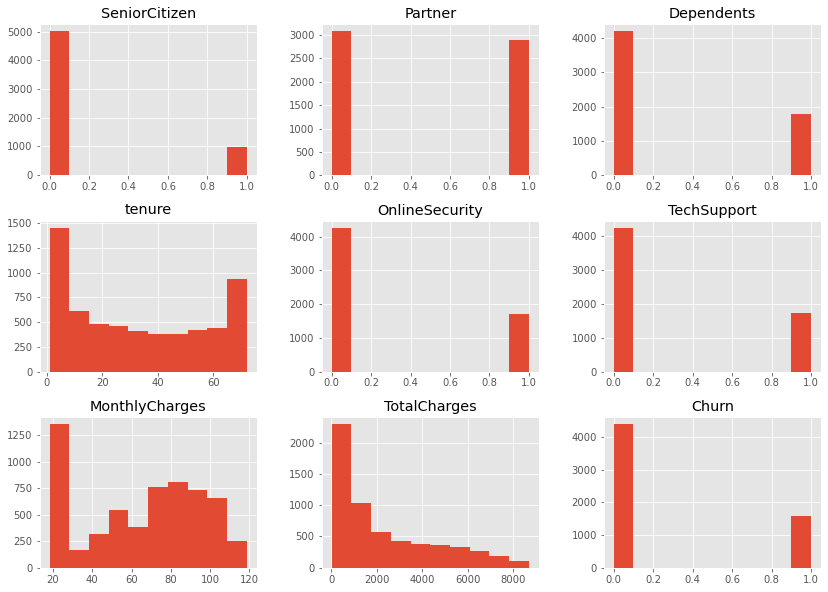

In [31]:
### YOUR CODE HERE ###
df.hist(column=df.columns, figsize=(14, 10))
None

In [32]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,TechSupport,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.00,0.02,-0.21,0.00,-0.04,-0.06,0.22,0.09,0.15
Partner,0.02,1.00,0.45,0.38,0.15,0.13,0.11,0.32,-0.15
Dependents,-0.21,0.45,1.00,0.17,0.08,0.07,-0.11,0.07,-0.16
tenure,0.00,0.38,0.17,1.00,0.33,0.33,0.26,0.83,-0.35
OnlineSecurity,-0.04,0.15,0.08,0.33,1.00,0.35,0.30,0.42,-0.17
TechSupport,-0.06,0.13,0.07,0.33,0.35,1.00,0.34,0.44,-0.16
MonthlyCharges,0.22,0.11,-0.11,0.26,0.30,0.34,1.00,0.66,0.19
TotalCharges,0.09,0.32,0.07,0.83,0.42,0.44,0.66,1.00,-0.20
Churn,0.15,-0.15,-0.16,-0.35,-0.17,-0.16,0.19,-0.20,1.00


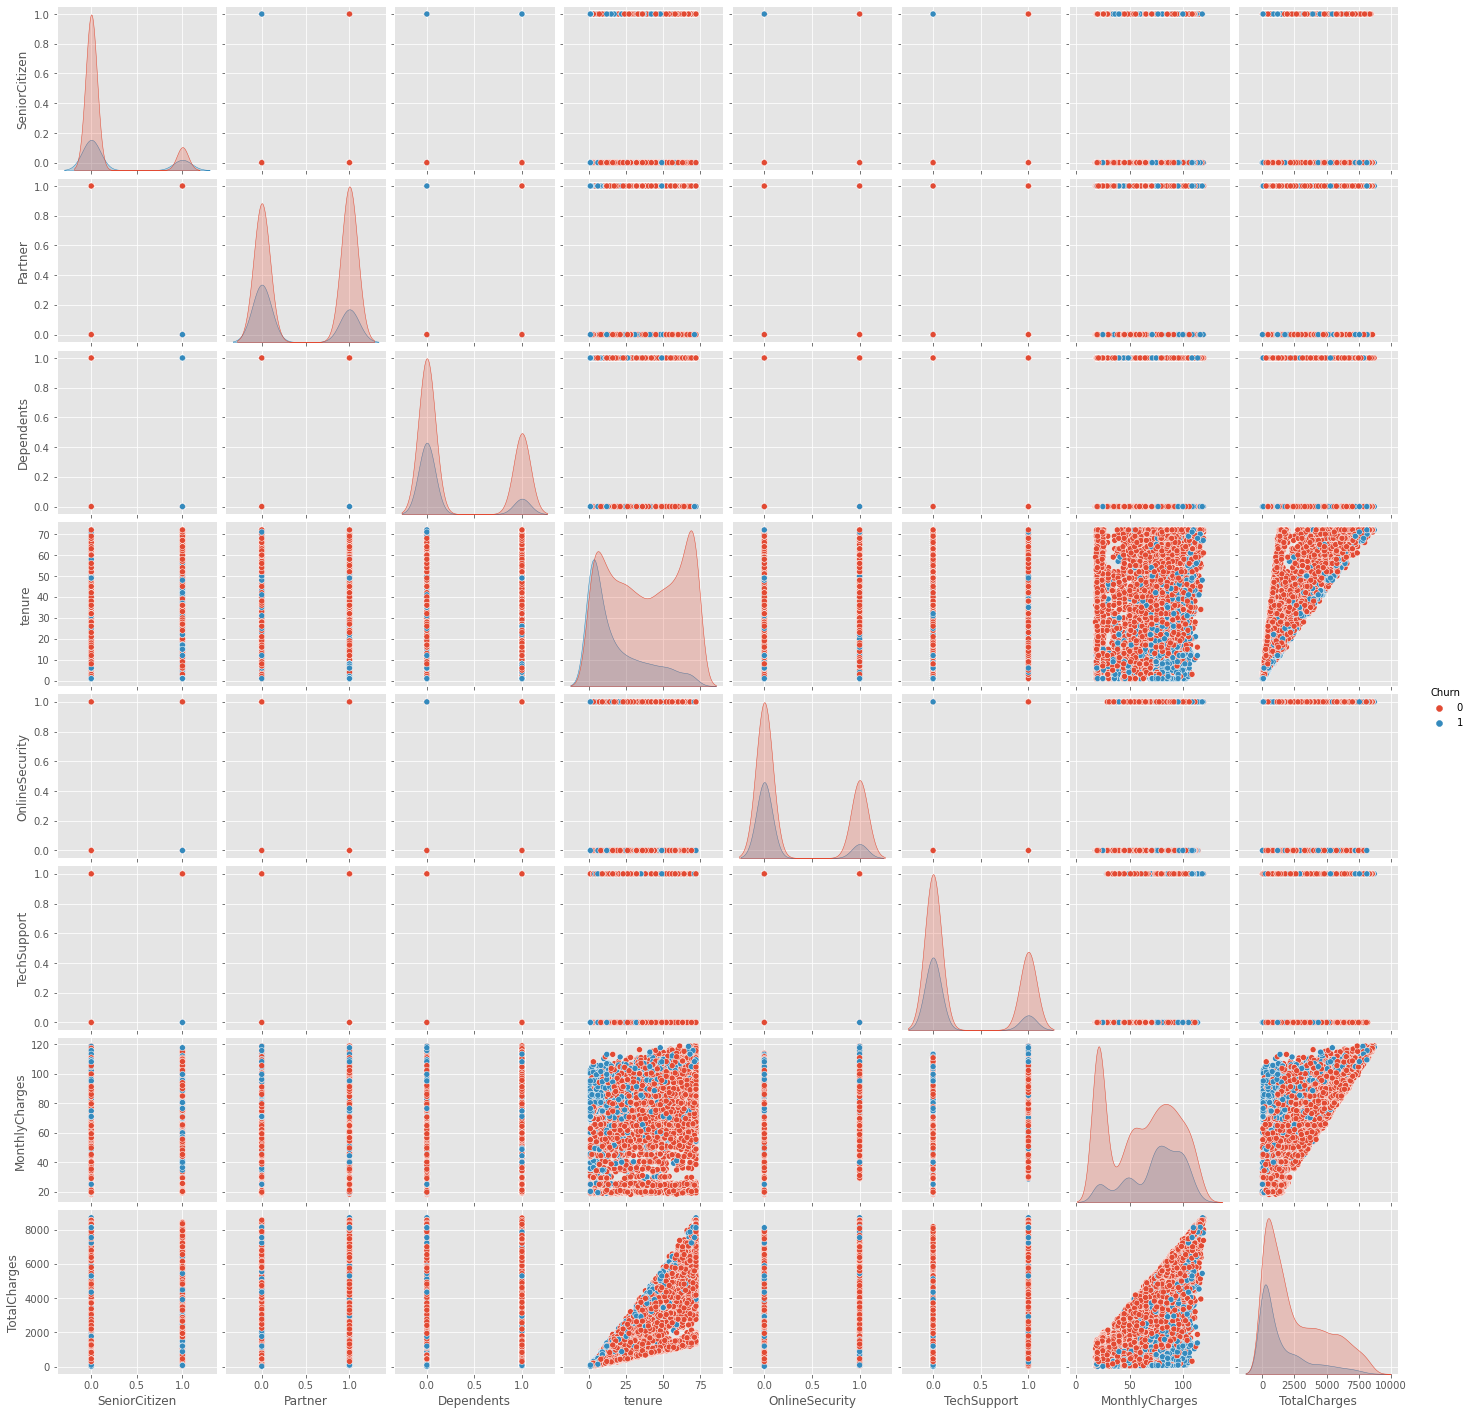

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df, hue='Churn')
plt.show()

## Распределение целевого признака в зависимости от пола

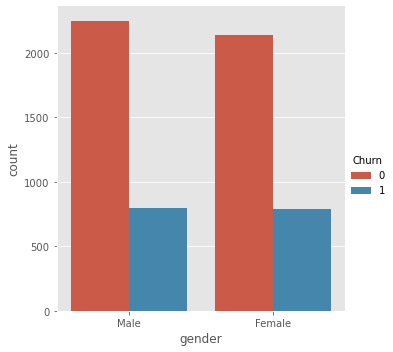

In [34]:
sns.catplot(x="gender",
            hue='Churn',
            kind='count',
            data=df);

### Вывод: Пол клиента на отток не влияет. Уберем признак из датасета

## Распределение целевого признака в зависимости от того является ли клиент пенсионером (1, 0)

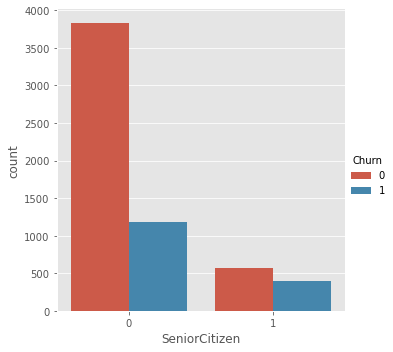

In [35]:
sns.catplot(x="SeniorCitizen",
            hue='Churn',
            kind='count',
            data=df);

### Вывод: Если клиент является пенсионером вероятность оттока высока

## Распределение целевого признака в зависимости от того состоит ли клиент в браке (Yes, No)

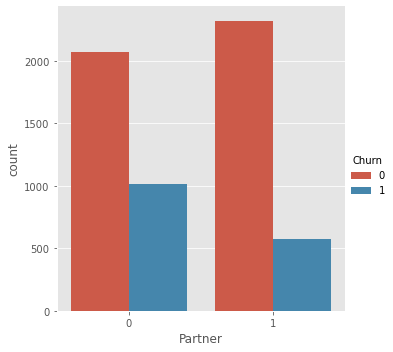

In [36]:
sns.catplot(x="Partner",
            hue='Churn',
            kind='count',
            data=df);

### Вывод: Если клиент не состоит в браке вероятность оттока выше

## Распределение целевого признака в зависимости от того есть ли у клиента иждивенцы (Yes, No)

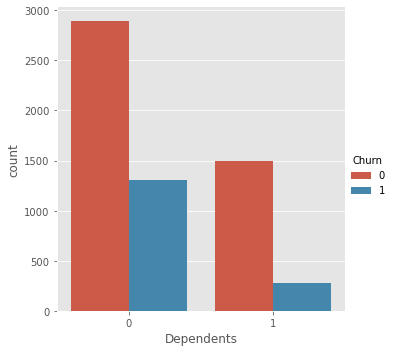

In [37]:
sns.catplot(x="Dependents",
            hue='Churn',
            kind='count',
            data=df);

### Вывод: Если у клиента есть иждивенцы вероятность отттока выше

## Распределение целевого признака в зависимости от того сколько месяцев человек являлся клиентом компании

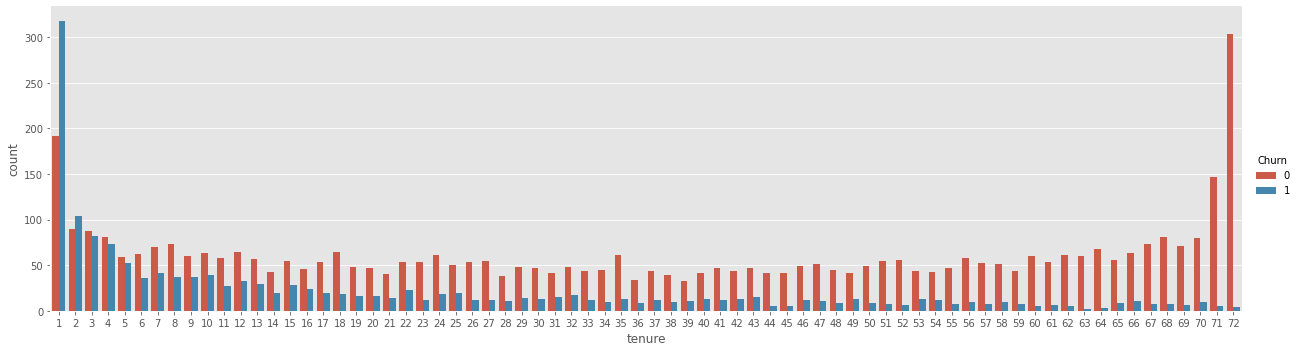

In [38]:
sns.catplot(x='tenure',
            hue='Churn',
            kind='count',
            data=df,
            height= 5, 
            aspect= 3.5);

### Вывод: Наиболее сильный отток в первый месяц, что логично. Если в первый месяц клиента не устаривает сервис, вероятность ухода высока

## Распределение целевого признака в зависимости от того подключена ли услуга телефонной связи (Yes, No)

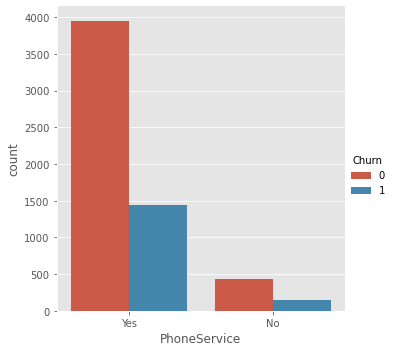

In [39]:
sns.catplot(x='PhoneService',
            hue='Churn',
            kind='count',
            data=df);

### Вывод: Такое впечатление, что не сильно поможет этот признак. Соотношение ушедших/не ушедших приблизительно одинаково, независимо от того подключен ли телефонный сервис или нет

## Распределение целевого признака в зависимости от того подключены ли несколько телефонных линий (Yes, No, No phone service)

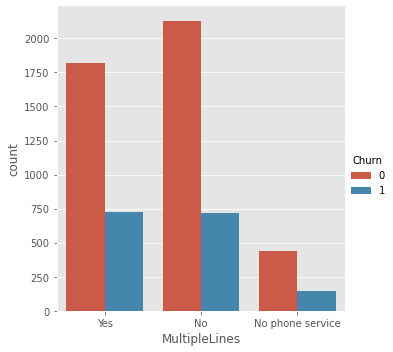

In [40]:
sns.catplot(x='MultipleLines',
            hue='Churn',
            kind='count',
            data=df);

### Вывод: Такое впечатление, что не сильно поможет этот признак. Соотношение ушедших/не ушедших приблизительно одинаково, независимо от того подключен ли телефонный сервис или нет

## Распределение целевого признака в зависимости от интернет-провайдера клиента (DSL, Fiber optic, No)

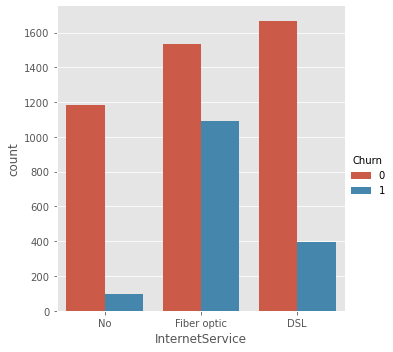

In [41]:
sns.catplot(x='InternetService',
            hue='Churn',
            kind='count',
            data=df);

### Вывод: Интересный признак, кто пользуется fiber optic намного чаще перестает пользоваться сервисом. Компании надо обратить внимание и посмотреть что не так с оптикой

## Распределение целевого признака в зависимости от подключена ли услуга онлайн-безопасности (Yes, No, No internet service)

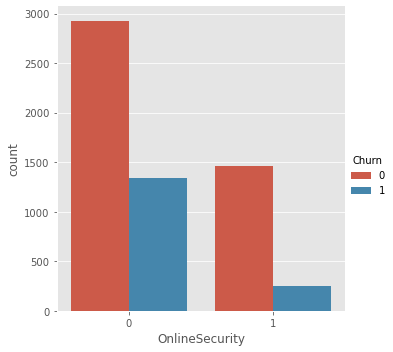

In [42]:
sns.catplot(x='OnlineSecurity',
            hue='Churn',
            kind='count',
            data=df);

### Вывод: Еще один интересный признак, у кого не подключена онлайн безопасность намного чаще перестает пользоваться сервисом. 

## Распределение целевого признака в зависимости от подключена ли услуга online backup (Yes, No, No internet service)

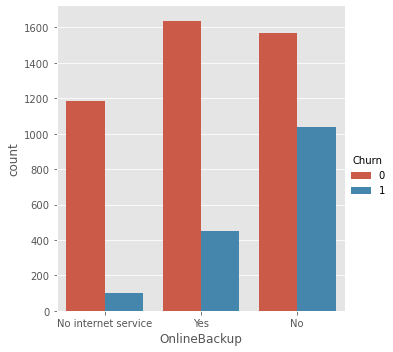

In [43]:
sns.catplot(x='OnlineBackup',
            hue='Churn',
            kind='count',
            data=df);

### Вывод: Еще один интересный признак, у кого не подключен онлайн backup намного чаще перестает пользоваться сервисом. 

## Распределение целевого признака в зависимости есть ли у клиента страховка оборудования (Yes, No, No internet service)

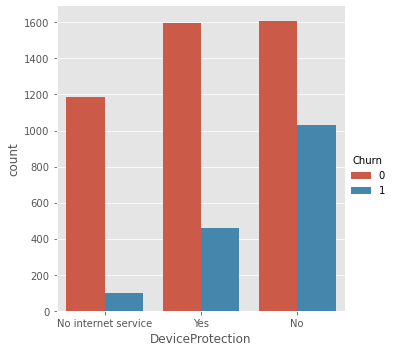

In [44]:
sns.catplot(x='DeviceProtection',
            hue='Churn',
            kind='count',
            data=df);

### Вывод: Еще один интересный признак, у кого нет страховки намного чаще перестает пользоваться сервисом. 

## Распределение целевого признака в зависимости подключена ли услуга технической поддержки (Yes, No, No internet service)

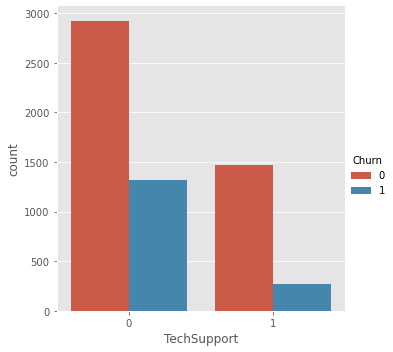

In [45]:
sns.catplot(x='TechSupport',
            hue='Churn',
            kind='count',
            data=df);

### Вывод: У кого нет тех поддержки намного чаще перестает пользоваться сервисом. 

## Распределение целевого признака в зависимости подключена ли услуга стримингового телевидения (Yes, No, No internet service)

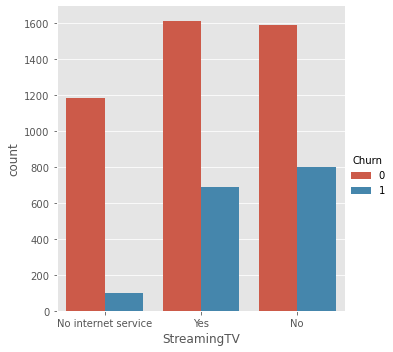

In [46]:
sns.catplot(x='StreamingTV',
            hue='Churn',
            kind='count',
            data=df);

### Вывод: Такое впечаление, что этот признак нам ничем не поможет

## Распределение целевого признака в зависимости подключена ли услуга подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)

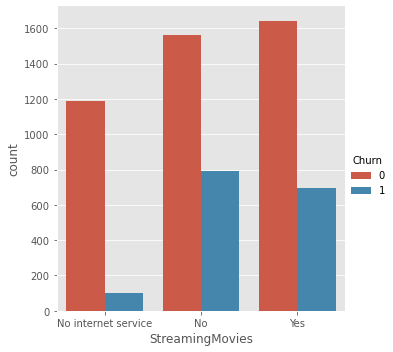

In [47]:
sns.catplot(x='StreamingMovies',
            hue='Churn',
            kind='count',
            data=df);

### Вывод: Аналогично вышесказанному

## Распределение целевого признака в зависимости от типа контракта клиента (Month-to-month, One year, Two year)

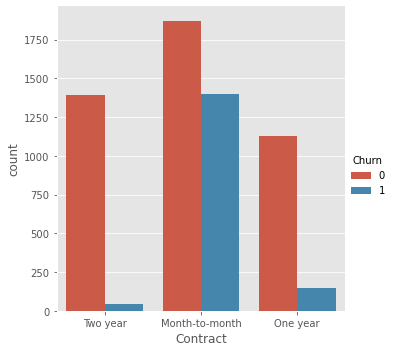

In [48]:
sns.catplot(x='Contract',
            hue='Churn',
            kind='count',
            data=df);

### Вывод: У кого у кого месячный контракт намного чаще перестают пользоваться сервисом, что в принципе логично. Расстаться проще, когда платишь только за месяц

## Распределение целевого признака в зависимости пользуется ли клиент безбумажным биллингом (Yes, No)

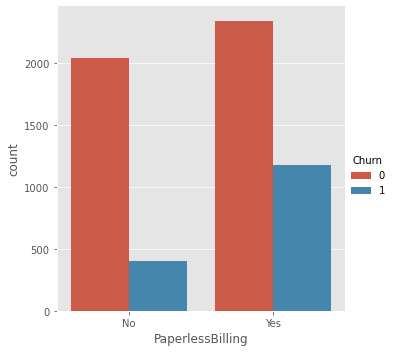

In [49]:
sns.catplot(x='PaperlessBilling',
            hue='Churn',
            kind='count',
            data=df);

### Вывод: У кого бумажные счета покидают компанию чаще. Пока непонятно как этим признаком воспользоваться

## Распределение целевого признака в зависимости от метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

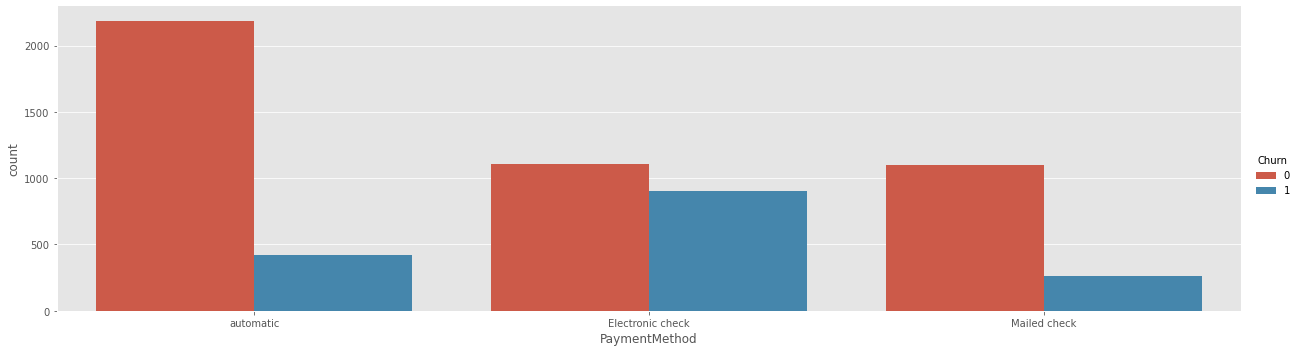

In [50]:
sns.catplot(x='PaymentMethod',
            hue='Churn',
            kind='count',
            data=df,
            height= 5, 
            aspect= 3.5);

### Вывод: У кого электронные чек намного чаще перестают пользоваться сервисом. 

## Общий вывод: Такое впечатление, что предоставляемый компанией базовый пакет неудовлетворительного качества или не соответствует стоимости, что дополнительно подтверждает отток пенсионеров (платить больше не хотят). Так как те, кто подключают доп.опции типа техподдержки, страховка, online backup, security и далее, компанию не покидают. Также компании надо обратить внимание fiber кабель

### Портрет клиента покидающего команию:
1. недавно подключился;
2. не подключает доп.услуги;
3. подключен к сервису через фибер кабель;
4. не имеет партнера, иждивенцев, пенсионер, оплчивает счета электронно

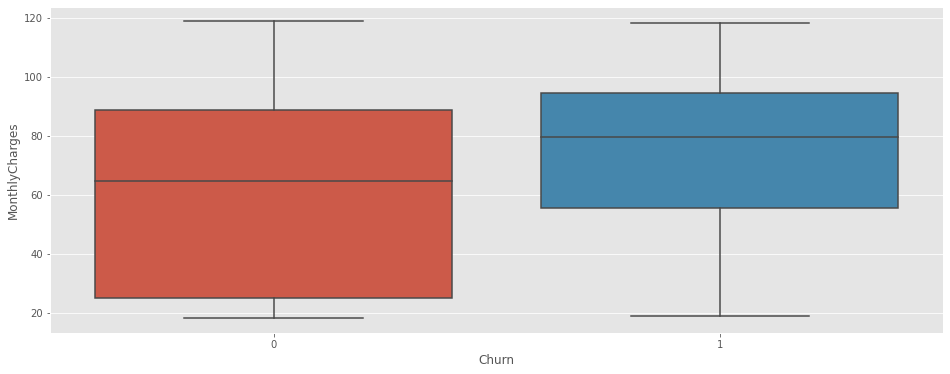

In [51]:
_, axes = plt.subplots(1, 1, sharey=True, figsize=(16,6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=axes);

## Интересное наблюдение, те кто уходят, в среднем тратят больше

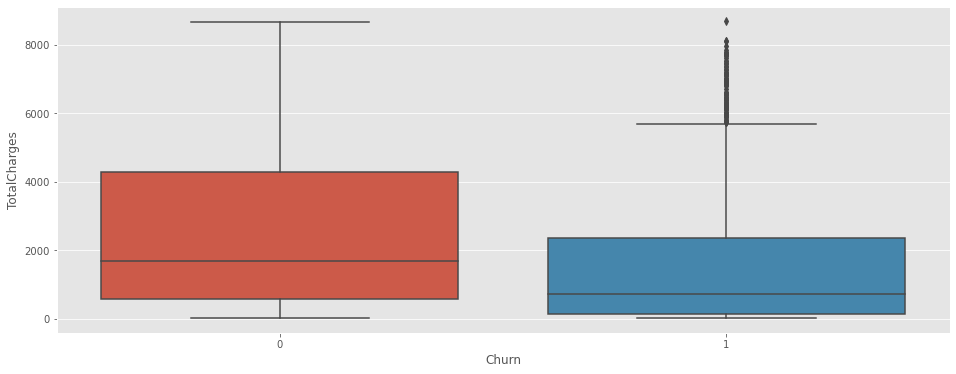

In [52]:
_, axes = plt.subplots(1, 1, sharey=True, figsize=(16,6))
sns.boxplot(x='Churn', y='TotalCharges', data=df, ax=axes);

## Разделение на трейн/тест

In [53]:
X = df.drop(["customerID", "Churn", 'gender', 'StreamingTV', 'StreamingMovies',
            'MultipleLines', 'PhoneService'], axis=1)
y = df["Churn"]

In [54]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
train_y.value_counts()

0    3511
1    1269
Name: Churn, dtype: int64

## Выбросы

In [55]:
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    
    return boundaries
boundaries = calculate_outliers(train_x.MonthlyCharges)
boundaries

(-46.14999999999999, 171.45)

In [56]:
is_outlier = (train_x.MonthlyCharges < boundaries[0]) | (train_x.MonthlyCharges > boundaries[1]) 
is_outlier.sum()

0

In [57]:
boundaries = calculate_outliers(test_x.MonthlyCharges)
is_outlier = (test_x.MonthlyCharges < boundaries[0]) | (test_x.MonthlyCharges > boundaries[1]) 
is_outlier.sum()

0

In [58]:
boundaries = calculate_outliers(test_x.TotalCharges)
is_outlier = (train_x.TotalCharges < boundaries[0]) | (train_x.TotalCharges > boundaries[1]) 
is_outlier.sum()

0

In [59]:
boundaries = calculate_outliers(test_x.TotalCharges)
is_outlier = (test_x.TotalCharges < boundaries[0]) | (test_x.TotalCharges> boundaries[1]) 
is_outlier.sum()

0

In [60]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4780 entries, 137 to 4637
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     4780 non-null   int64  
 1   Partner           4780 non-null   int64  
 2   Dependents        4780 non-null   int64  
 3   tenure            4780 non-null   int64  
 4   InternetService   4780 non-null   object 
 5   OnlineSecurity    4780 non-null   int32  
 6   OnlineBackup      4780 non-null   object 
 7   DeviceProtection  4780 non-null   object 
 8   TechSupport       4780 non-null   int32  
 9   Contract          4780 non-null   object 
 10  PaperlessBilling  4780 non-null   object 
 11  PaymentMethod     4780 non-null   object 
 12  MonthlyCharges    4780 non-null   float64
 13  TotalCharges      4780 non-null   float64
dtypes: float64(2), int32(2), int64(4), object(6)
memory usage: 522.8+ KB


In [61]:
num_cols = [
    "MonthlyCharges",
    "TotalCharges",
    "tenure"
]

cat_cols = [
    "OnlineSecurity", "TechSupport",
    "Contract", "Dependents", "PaperlessBilling",
    "Partner", "InternetService"
]

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_mm = scaler.fit_transform(train_x[num_cols])
X_train_mm = pd.DataFrame(data = x_train_mm,  
               columns =['MonthlyCharges_std', 'TotalCharges_std', "tenure_std"])
x_test_mm = scaler.transform(test_x[num_cols])
X_test_mm = pd.DataFrame(data = x_test_mm,  
               columns =['MonthlyCharges_std','TotalCharges_std', "tenure_std"])                              
train_x = pd.concat([X_train_mm, train_x.reset_index(drop=True)], axis=1)
test_x = pd.concat([X_test_mm, test_x.reset_index(drop=True)], axis=1)
columns_for_drop = ['MonthlyCharges','TotalCharges',"tenure"]
train_x = train_x.drop(columns=columns_for_drop) 
test_x = test_x.drop(columns=columns_for_drop) 

In [63]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')

ft = ohe.fit_transform(train_x[cat_cols])
df_ft = pd.DataFrame(ft, columns=ohe.get_feature_names_out())
train_x = pd.concat([df_ft, train_x], axis=1)
ft1 = ohe.transform(test_x[cat_cols])
df_ft1 = pd.DataFrame(ft1, columns=ohe.get_feature_names_out())
test_x = pd.concat([df_ft1, test_x], axis=1)
columns_for_drop = ["Dependents", "Partner",
   "InternetService", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "Contract", "PaperlessBilling", "PaymentMethod"]
train_x = train_x.drop(columns=columns_for_drop) 
test_x = test_x.drop(columns=columns_for_drop) 

## Обучение с помощью всех признаков

In [64]:
X1 = df.drop(["customerID", "Churn"], axis=1)
train_x1, test_x1, train_y1, test_y1 = train_test_split(X1, y, stratify=y, test_size=0.2, random_state=42)
num_cols = [
    "MonthlyCharges",
    "TotalCharges",
    "SeniorCitizen",
    "tenure"
]

cat_cols = [
    "gender",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
     "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod"
]
scaler = StandardScaler()

x_train_mm1 = scaler.fit_transform(train_x1[num_cols])
X_train_mm1 = pd.DataFrame(data = x_train_mm1,  
                  columns =['MonthlyCharges_std','TotalCharges_std','SeniorCitizen_std',
                           "tenure_std"])
x_test_mm1 = scaler.transform(test_x1[num_cols])
X_test_mm1 = pd.DataFrame(data = x_test_mm1,  
                  columns =['MonthlyCharges_std','TotalCharges_std','SeniorCitizen_std',
                           "tenure_std"])
train_x1 = pd.concat([X_train_mm1, train_x1.reset_index(drop=True)], axis=1)
test_x1 = pd.concat([X_test_mm1, test_x1.reset_index(drop=True)], axis=1)
columns_for_drop = ['MonthlyCharges','TotalCharges','SeniorCitizen', "tenure"]
train_x1 = train_x1.drop(columns=columns_for_drop) 
test_x1 = test_x1.drop(columns=columns_for_drop) 

ohe = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')

ft3 = ohe.fit_transform(train_x1[cat_cols])
df_ft3 = pd.DataFrame(ft3, columns=ohe.get_feature_names_out())
train_x1 = pd.concat([df_ft3, train_x1], axis=1)
ft4 = ohe.transform(test_x1[cat_cols])
df_ft4 = pd.DataFrame(ft4, columns=ohe.get_feature_names_out())
test_x1 = pd.concat([df_ft4, test_x1], axis=1)
columns_for_drop = [ "gender", "Partner", "Dependents", "PhoneService",
    "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
    "Contract", "PaperlessBilling", "PaymentMethod"]
train_x1 = train_x1.drop(columns=columns_for_drop) 
test_x1 = test_x1.drop(columns=columns_for_drop) 

## Определение количества признаков с помощью PCA

In [65]:
from sklearn.decomposition import PCA
pca = PCA(0.9).fit(train_x1)
print('We need %d components to explain 90%% of variance(дисперсии)' 
      % pca.n_components_)

We need 13 components to explain 90% of variance(дисперсии)


In [66]:
pca = PCA(n_components=13).fit(train_x1)
train_x2 = pca.transform(train_x1)
test_x2 = pca.fit_transform(test_x1)
train_x2.shape

(4780, 13)

## Точность модели на признаках, отобранных PCA ниже,чем в остальных 2х вариантах, поэтому не стал в блокноте дальше показывать

# 3. Построение моделей для прогнозирования оттока

## Логистическая регрессия на вручную отобранных признаках

AUC_train: 0.839 AUC_test: 0.836


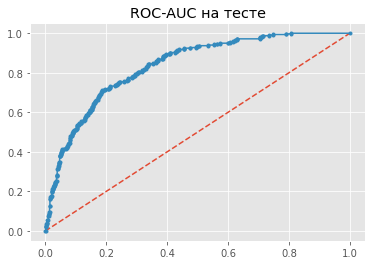

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
logreg = LogisticRegression()
logreg.fit(train_x, train_y)
probs_train = logreg.predict_proba(train_x)[:, 1]
probs_test = logreg.predict_proba(test_x)[:, 1]
auc_train = roc_auc_score(train_y, probs_train)
auc_test = roc_auc_score(test_y, probs_test)
print("AUC_train: %.3f" % auc_train, "AUC_test: %.3f" % auc_test)

fpr, tpr, thresholds = roc_curve(test_y, probs_test)
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("ROC-AUC на тесте")
plt.show()

## Логистическая регрессия на всех признаках

AUC_train: 0.846 AUC_test: 0.837


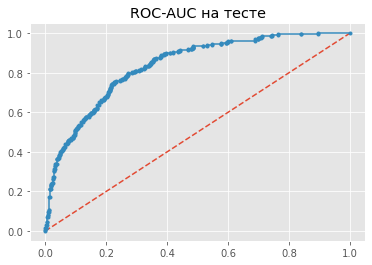

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
logreg1 = LogisticRegression()
logreg1.fit(train_x1, train_y1)
probs_train = logreg1.predict_proba(train_x1)[:, 1]
probs_test = logreg1.predict_proba(test_x1)[:, 1]
auc_train = roc_auc_score(train_y1, probs_train)
auc_test = roc_auc_score(test_y1, probs_test)
print("AUC_train: %.3f" % auc_train, "AUC_test: %.3f" % auc_test)

fpr, tpr, thresholds = roc_curve(test_y1, probs_test)
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("ROC-AUC на тесте")
plt.show()

## Логистическая регрессияCV на вручную отобранных признаках

In [69]:
f1 = make_scorer(roc_auc_score)
from sklearn.linear_model import LogisticRegressionCV
lr_cv1 = LogisticRegressionCV(Cs=[0.01,0.1,1,5,10,50,100],random_state=0, solver='liblinear',multi_class='ovr',penalty='l1',max_iter=100,cv=3,scoring=f1,class_weight='balanced').fit(train_x, train_y)
probs1 = lr_cv1.predict_proba(train_x)[:, 1]
probs2 = lr_cv1.predict_proba(test_x)[:, 1]
auc1 = roc_auc_score(train_y, probs1)
auc2 = roc_auc_score(test_y, probs2)
print("AUC_train: %.3f" % auc1, "AUC_test: %.3f" % auc2)

AUC_train: 0.839 AUC_test: 0.836


## Логистическая регрессияCV на всех признаках

In [70]:
f1 = make_scorer(roc_auc_score)
from sklearn.linear_model import LogisticRegressionCV
lr_cv2 = LogisticRegressionCV(Cs=[0.01,0.1,1,5,10,50,100],random_state=0, solver='liblinear',multi_class='ovr',penalty='l1',max_iter=100,cv=3,scoring=f1,class_weight='balanced').fit(train_x1, train_y1)
probs1 = lr_cv2.predict_proba(train_x1)[:, 1]
probs2 = lr_cv2.predict_proba(test_x1)[:, 1]
auc1 = roc_auc_score(train_y1, probs1)
auc2 = roc_auc_score(test_y1, probs2)
print("AUC_train: %.3f" % auc1, "AUC_test: %.3f" % auc2)

AUC_train: 0.845 AUC_test: 0.833


## Тюнинг логистической регрессии на вручную отобранных признаках

In [71]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': np.logspace(-4, 4, 50),
'penalty': ['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state = 42), param_grid, cv = 5, verbose = 0, n_jobs = -1, scoring = "roc_auc")
best_model = clf.fit(train_x, train_y) 
print(clf.best_params_)
print(clf.best_score_)
print(clf.best_estimator_)

{'C': 3237.45754281764, 'penalty': 'l2'}
0.8367568272544037
LogisticRegression(C=3237.45754281764, random_state=42)


## Тюнинг логистической регрессии на всех признаках

In [72]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': np.logspace(-4, 4, 50),
'penalty': ['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state = 42), param_grid, cv = 5, verbose = 0, n_jobs = -1, scoring = "roc_auc")
best_model = clf.fit(train_x1, train_y1) 
print(clf.best_params_)
print(clf.best_score_)
print(clf.best_estimator_)

{'C': 16.768329368110066, 'penalty': 'l2'}
0.8426432269015018
LogisticRegression(C=16.768329368110066, random_state=42)


In [73]:
df_new = pd.DataFrame(columns=['Model', 'Result'])

AUC_train: 0.847 AUC_test: 0.837


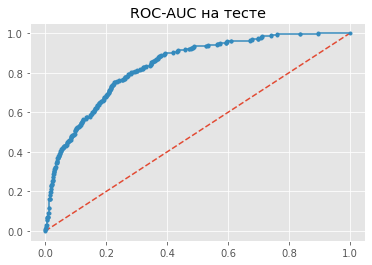

In [74]:
logreg = LogisticRegression(C=16.768329368110066, penalty ='l2', random_state=42)
logreg.fit(train_x1, train_y1)
probs_train = logreg.predict_proba(train_x1)[:, 1]
probs_test = logreg.predict_proba(test_x1)[:, 1]
auc_train = roc_auc_score(train_y1, probs_train)
auc_test = roc_auc_score(test_y1, probs_test)
print("AUC_train: %.3f" % auc_train, "AUC_test: %.3f" % auc_test)
new_row = {'Model': 'LogisticRegression', 'Result': auc_test}
df_new = df_new.append(new_row, ignore_index=True)
fpr, tpr, thresholds = roc_curve(test_y1, probs_test)
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("ROC-AUC на тесте")
plt.show()

In [75]:
param_grid = {'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'penalty': ['l2', 'none']}
clf = GridSearchCV(LogisticRegression(random_state = 42), param_grid, cv = 3, verbose = 0, n_jobs = -1, scoring="roc_auc")
best_model = clf.fit(train_x, train_y) 
print(clf.best_params_)
print(clf.best_score_)
print(clf.best_estimator_)

{'penalty': 'none', 'solver': 'lbfgs'}
0.834888719685614
LogisticRegression(penalty='none', random_state=42)


In [76]:
param_grid = {'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'penalty': ['l2', 'none']}
clf = GridSearchCV(LogisticRegression(random_state = 42), param_grid, cv = 3, verbose = 0, n_jobs = -1, scoring="roc_auc")
best_model = clf.fit(train_x1, train_y1) 
print(clf.best_params_)
print(clf.best_score_)
print(clf.best_estimator_)

{'penalty': 'none', 'solver': 'saga'}
0.8399236651543686
LogisticRegression(penalty='none', random_state=42, solver='saga')


## AdaBoostClassifier на вручную отобранных признаках

AUC_train: 0.855 AUC_test: 0.832


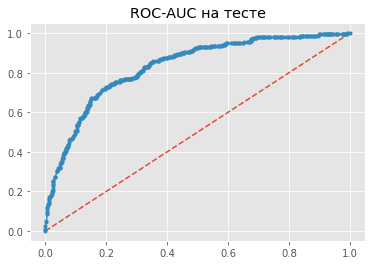

In [77]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
qwe = ada.fit(train_x, train_y)
probs_train = qwe.predict_proba(train_x)[:, 1]
probs_test = qwe.predict_proba(test_x)[:, 1]
auc_train = roc_auc_score(train_y, probs_train)
auc_test = roc_auc_score(test_y, probs_test)
print("AUC_train: %.3f" % auc_train, "AUC_test: %.3f" % auc_test)
new_row = {'Model': 'AdaBoostClassifier', 'Result': auc_test}
df_new = df_new.append(new_row, ignore_index=True)
fpr, tpr, thresholds = roc_curve(test_y, probs_test)
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("ROC-AUC на тесте")
plt.show()

## AdaBoostClassifier на всех признаках

AUC_train: 0.858 AUC_test: 0.829


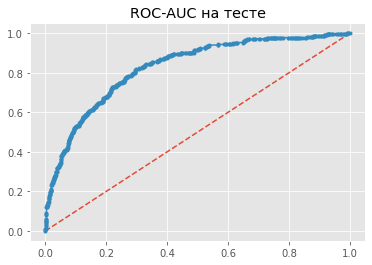

In [78]:
ada=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
qwe = ada.fit(train_x1, train_y1)
probs_train = qwe.predict_proba(train_x1)[:, 1]
probs_test = qwe.predict_proba(test_x1)[:, 1]
auc_train = roc_auc_score(train_y1, probs_train)
auc_test = roc_auc_score(test_y1, probs_test)
print("AUC_train: %.3f" % auc_train, "AUC_test: %.3f" % auc_test)
# new_row = {'Model': 'AdaBoostClassifier', 'Result': auc_test}
# df_new = df_new.append(new_row, ignore_index=True)
fpr, tpr, thresholds = roc_curve(test_y1, probs_test)
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("ROC-AUC на тесте")
plt.show()

## GradientBoostingClassifier на вручную отобранных признаках

AUC_train: 0.850 AUC_test: 0.841


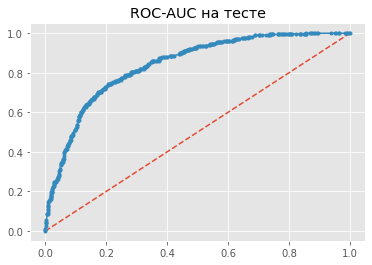

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, 
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, 
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
gbdt.fit(train_x, train_y)
probs_train = gbdt.predict_proba(train_x)[:, 1]
probs_test = gbdt.predict_proba(test_x)[:, 1]
auc_train = roc_auc_score(train_y, probs_train)
auc_test = roc_auc_score(test_y, probs_test)
print("AUC_train: %.3f" % auc_train, "AUC_test: %.3f" % auc_test)
new_row = {'Model': 'GradientBoostingClassifier', 'Result': auc_test}
df_new = df_new.append(new_row, ignore_index=True)
fpr, tpr, thresholds = roc_curve(test_y, probs_test)
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("ROC-AUC на тесте")
plt.show()

## GradientBoostingClassifier на всех признаках

AUC_train: 0.867 AUC_test: 0.842


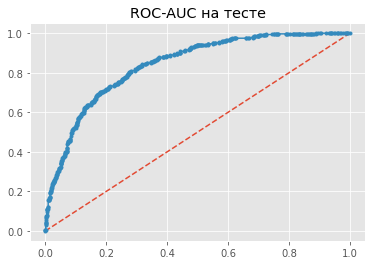

In [80]:
gbdt = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, 
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, 
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
gbdt.fit(train_x1, train_y1)
probs_train = gbdt.predict_proba(train_x1)[:, 1]
probs_test = gbdt.predict_proba(test_x1)[:, 1]
auc_train = roc_auc_score(train_y1, probs_train)
auc_test = roc_auc_score(test_y1, probs_test)
print("AUC_train: %.3f" % auc_train, "AUC_test: %.3f" % auc_test)
new_row = {'Model': 'GradientBoostingClassifier on all features', 'Result': auc_test}
df_new = df_new.append(new_row, ignore_index=True)
fpr, tpr, thresholds = roc_curve(test_y1, probs_test)
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("ROC-AUC на тесте")
plt.show()

## SVM на вручную отобранных признаках

AUC_train: 0.818 AUC_test: 0.804


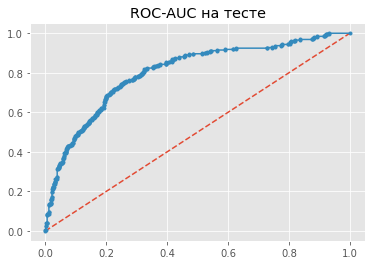

In [81]:
svmodel = SVC(kernel="linear", probability=True)
svmodel.fit(train_x, train_y)
probs_train = svmodel.predict_proba(train_x)[:, 1]
probs_test = svmodel.predict_proba(test_x)[:, 1]
auc_train = roc_auc_score(train_y, probs_train)
auc_test = roc_auc_score(test_y, probs_test)
print("AUC_train: %.3f" % auc_train, "AUC_test: %.3f" % auc_test)
new_row = {'Model': 'SVC', 'Result': auc_test}
df_new = df_new.append(new_row, ignore_index=True)
fpr, tpr, thresholds = roc_curve(test_y, probs_test)
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("ROC-AUC на тесте")
plt.show()

## SVM на всех признаках

AUC_train: 0.835 AUC_test: 0.817


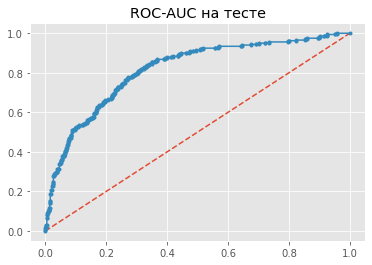

In [82]:
svmodel = SVC(kernel="linear", probability=True)
svmodel.fit(train_x1, train_y1)
probs_train = svmodel.predict_proba(train_x1)[:, 1]
probs_test = svmodel.predict_proba(test_x1)[:, 1]
auc_train = roc_auc_score(train_y1, probs_train)
auc_test = roc_auc_score(test_y1, probs_test)
print("AUC_train: %.3f" % auc_train, "AUC_test: %.3f" % auc_test)
# new_row = {'Model': 'SVC', 'Result': auc_test}
# df_new = df_new.append(new_row, ignore_index=True)
fpr, tpr, thresholds = roc_curve(test_y1, probs_test)
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("ROC-AUC на тесте")
plt.show()

In [83]:
# svmodel = SVC(kernel="rbf", probability=True)
# svmodel.fit(train_x, train_y)
# probs_train = svmodel.predict_proba(train_x)[:, 1]
# probs_test = svmodel.predict_proba(test_x)[:, 1]
# auc_train = roc_auc_score(train_y, probs_train)
# auc_test = roc_auc_score(test_y, probs_test)
# print("AUC_train: %.3f" % auc_train, "AUC_test: %.3f" % auc_test)

# fpr, tpr, thresholds = roc_curve(test_y, probs_test)
# plt.plot([0, 1], [0, 1], linestyle = "--")
# plt.plot(fpr, tpr, marker = ".")
# plt.title("ROC-AUC на тесте")
# plt.show()

In [84]:
# svmodel = SVC(kernel="poly", probability=True)
# svmodel.fit(train_x, train_y)
# probs_train = svmodel.predict_proba(train_x)[:, 1]
# probs_test = svmodel.predict_proba(test_x)[:, 1]
# auc_train = roc_auc_score(train_y, probs_train)
# auc_test = roc_auc_score(test_y, probs_test)
# print("AUC_train: %.3f" % auc_train, "AUC_test: %.3f" % auc_test)

# fpr, tpr, thresholds = roc_curve(test_y, probs_test)
# plt.plot([0, 1], [0, 1], linestyle = "--")
# plt.plot(fpr, tpr, marker = ".")
# plt.title("ROC-AUC на тесте")
# plt.show()

In [85]:
# svmodel = SVC(kernel="sigmoid", probability=True)
# svmodel.fit(train_x, train_y)
# probs_train = svmodel.predict_proba(train_x)[:, 1]
# probs_test = svmodel.predict_proba(test_x)[:, 1]
# auc_train = roc_auc_score(train_y, probs_train)
# auc_test = roc_auc_score(test_y, probs_test)
# print("AUC_train: %.3f" % auc_train, "AUC_test: %.3f" % auc_test)

# fpr, tpr, thresholds = roc_curve(test_y, probs_test)
# plt.plot([0, 1], [0, 1], linestyle = "--")
# plt.plot(fpr, tpr, marker = ".")
# plt.title("ROC-AUC на тесте")
# plt.show()

## Ближайшие соседи на вручную отобранных признаках

In [86]:
from sklearn.model_selection import GridSearchCV
params = {
    "n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,21, 23, 25, 27, 29, 31, 33, 35, 40], 
    "metric": ['manhattan', 'euclidean'],
    "weights": ['uniform', 'distance']
}
clf = KNeighborsClassifier()
clf_grid = GridSearchCV(clf, params, cv=5, scoring="roc_auc", n_jobs=-1)
clf_grid.fit(train_x, train_y)
print(clf_grid.best_params_)
print(clf_grid.best_score_)
print(clf_grid.best_estimator_)
new_row = {'Model': 'KNeighborsClassifier', 'Result': clf_grid.best_score_}
df_new = df_new.append(new_row, ignore_index=True)

{'metric': 'manhattan', 'n_neighbors': 35, 'weights': 'uniform'}
0.8279546533956523
KNeighborsClassifier(metric='manhattan', n_neighbors=35)


## Ближайшие соседи на всех признаках

In [87]:
from sklearn.model_selection import GridSearchCV
params = {
    "n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,21, 23, 25, 27, 29, 31, 33, 35, 40], 
    "metric": ['manhattan', 'euclidean'],
    "weights": ['uniform', 'distance']
}
clf = KNeighborsClassifier()
clf_grid = GridSearchCV(clf, params, cv=5, scoring="roc_auc", n_jobs=-1)
clf_grid.fit(train_x1, train_y1)
print(clf_grid.best_params_)
print(clf_grid.best_score_)
print(clf_grid.best_estimator_)
# new_row = {'Model': 'KNeighborsClassifier', 'Result': clf_grid.best_score_}
# df_new = df_new.append(new_row, ignore_index=True)

{'metric': 'manhattan', 'n_neighbors': 40, 'weights': 'uniform'}
0.8315102381513487
KNeighborsClassifier(metric='manhattan', n_neighbors=40)


## Многослойный перспетрон на вручную отобранных признаках

AUC_train: 0.866 AUC_test: 0.829


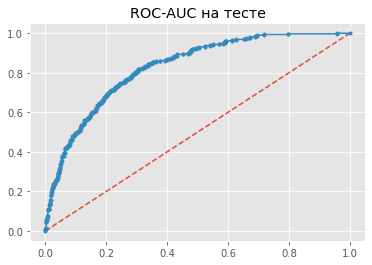

In [88]:
mlp = MLPClassifier(random_state=42).fit(train_x, train_y)
probs_train = mlp.predict_proba(train_x)[:, 1]
probs_test = mlp.predict_proba(test_x)[:, 1]
auc_train = roc_auc_score(train_y, probs_train)
auc_test = roc_auc_score(test_y, probs_test)
print("AUC_train: %.3f" % auc_train, "AUC_test: %.3f" % auc_test)
new_row = {'Model': 'MLPClassifier', 'Result': auc_test}
df_new = df_new.append(new_row, ignore_index=True)
fpr, tpr, thresholds = roc_curve(test_y, probs_test)
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("ROC-AUC на тесте")
plt.show()

## Многослойный перспетрон на всех признаках

AUC_train: 0.909 AUC_test: 0.818


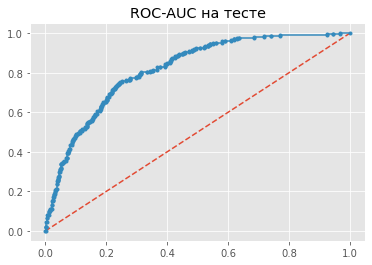

In [89]:
mlp = MLPClassifier(random_state=42).fit(train_x1, train_y1)
probs_train = mlp.predict_proba(train_x1)[:, 1]
probs_test = mlp.predict_proba(test_x1)[:, 1]
auc_train = roc_auc_score(train_y1, probs_train)
auc_test = roc_auc_score(test_y1, probs_test)
print("AUC_train: %.3f" % auc_train, "AUC_test: %.3f" % auc_test)
fpr, tpr, thresholds = roc_curve(test_y1, probs_test)
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("ROC-AUC на тесте")
plt.show()

## Случайный лес на вручную отобранных признаках

Text(0, 0.5, 'ROC-AUC')

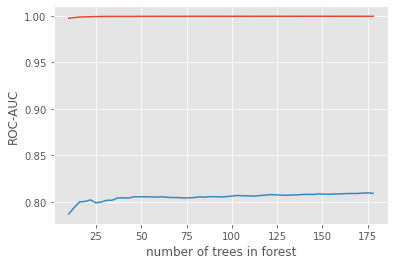

In [90]:
N = []
f_train, f_test = [], []

for n in np.arange(10, 180, 3):
    rf = RandomForestClassifier(n_estimators = n, class_weight = "balanced", random_state=17, oob_score = True)
    rf.fit(train_x, train_y)
    pred_train = rf.predict_proba(train_x)[:, 1]
    pred_rf = rf.predict_proba(test_x)[:, 1]
    N.append(n)
    f_train.append(roc_auc_score(train_y,  pred_train))
    f_test.append(roc_auc_score(test_y,  pred_rf))

plt.plot(N, f_train, '-')
plt.plot(N, f_test, '-')
plt.xlabel('number of trees in forest')
plt.ylabel('ROC-AUC')

### Определение оптимального количества деревьев

In [91]:
f_imp_list1 = list(zip(N, f_test))
f_imp_list1.sort(key = lambda x: x[1], reverse=True)
f_imp_list1[:15]

[(175, 0.8096391885503074),
 (172, 0.8092774458818641),
 (178, 0.809026733141359),
 (166, 0.8089318204610251),
 (169, 0.8089318204610249),
 (163, 0.8088279537542442),
 (160, 0.8085109812180341),
 (148, 0.8084841191386944),
 (157, 0.8084053237059642),
 (151, 0.8081761006289307),
 (154, 0.8081367029125658),
 (142, 0.8080095557370238),
 (145, 0.8079074798355323),
 (139, 0.807816148765777),
 (121, 0.807705118837839)]

## Тюнинг случайного леса на вручную отобранных признаках

In [92]:
parameters = {'max_depth' : np.arange(2, 100, 4),
          'max_features' : ['sqrt', 'log2', "auto"],
          'min_samples_split' : [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)],
          'min_samples_leaf' : [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
          }
xlf = RandomForestClassifier(n_estimators=175, random_state=17, oob_score = True)
cv = RandomizedSearchCV(estimator = xlf, param_distributions=parameters, scoring = "roc_auc", n_iter = 80, cv=3, n_jobs = -1)
cv.fit(train_x, train_y)    
print(cv.best_params_)
print(cv.best_score_)

{'min_samples_split': 44, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 66}
0.8376833149793965


AUC_train: 0.875 AUC_test: 0.838


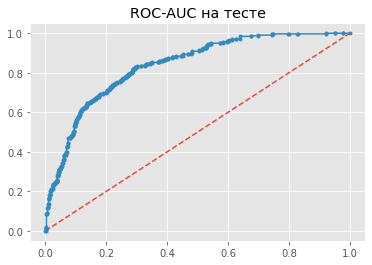

In [93]:
best_rf = RandomForestClassifier(n_estimators = 175, min_samples_split=44, min_samples_leaf=18, 
                              max_features = 'sqrt', max_depth = 42,
                             random_state=17, oob_score = True).fit(train_x, train_y)
probs_train = best_rf.predict_proba(train_x)[:, 1]
probs_test = best_rf.predict_proba(test_x)[:, 1]
auc_train = roc_auc_score(train_y, probs_train)
auc_test = roc_auc_score(test_y, probs_test)
print("AUC_train: %.3f" % auc_train, "AUC_test: %.3f" % auc_test)
new_row = {'Model': 'RandomForestClassifier', 'Result': auc_test}
df_new = df_new.append(new_row, ignore_index=True)
fpr, tpr, thresholds = roc_curve(test_y, probs_test)
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("ROC-AUC на тесте")
plt.show()

### feature_importance

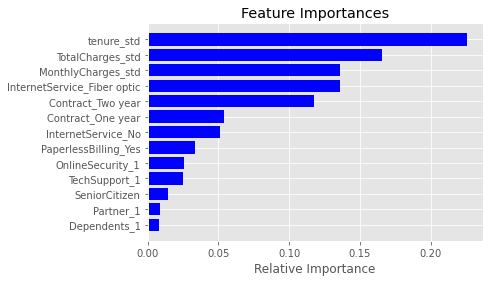

In [94]:
features = train_x.columns
importances = best_rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Случайный лес на всех признаках

Text(0, 0.5, 'ROC-AUC')

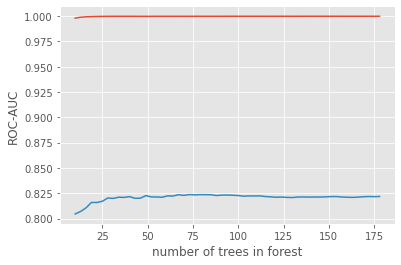

In [95]:
N = []
f_train, f_test = [], []

for n in np.arange(10, 180, 3):
    rf = RandomForestClassifier(n_estimators = n, class_weight = "balanced", random_state=17, oob_score = True)
    rf.fit(train_x1, train_y1)
    pred_train = rf.predict_proba(train_x1)[:, 1]
    pred_rf = rf.predict_proba(test_x1)[:, 1]
    N.append(n)
    f_train.append(roc_auc_score(train_y1,  pred_train))
    f_test.append(roc_auc_score(test_y1,  pred_rf))

plt.plot(N, f_train, '-')
plt.plot(N, f_test, '-')
plt.xlabel('number of trees in forest')
plt.ylabel('ROC-AUC')

### Определение оптимального количества деревьев

In [96]:
f_imp_list10 = list(zip(N, f_test))
f_imp_list10.sort(key = lambda x: x[1], reverse=True)
f_imp_list10[:15]

[(73, 0.8236558215498345),
 (79, 0.8235877709488403),
 (82, 0.8235662812853685),
 (67, 0.8235179295425568),
 (85, 0.8235071847108207),
 (76, 0.8233764559247001),
 (94, 0.8232331915015544),
 (91, 0.8231454420423776),
 (97, 0.8230057592298105),
 (70, 0.8228768212489792),
 (88, 0.8227156487729402),
 (100, 0.8227066947464936),
 (49, 0.8226064096502916),
 (61, 0.8223807681838369),
 (112, 0.8223431612727611)]

### Тюнинг случайного леса  на всех признаках

In [97]:
parameters = {'max_depth' : np.arange(2, 100, 4),
          'max_features' : ['sqrt', 'log2', "auto"],
          'min_samples_split' : [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)],
          'min_samples_leaf' : [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
          }
xlf = RandomForestClassifier(n_estimators=73, random_state=17, oob_score = True)
cv = RandomizedSearchCV(estimator = xlf, param_distributions=parameters, scoring = "roc_auc", n_iter = 80, cv=3, n_jobs = -1)
cv.fit(train_x1, train_y1)    
print(cv.best_params_)
print(cv.best_score_)

{'min_samples_split': 34, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 78}
0.8406660834911123


AUC_train: 0.888 AUC_test: 0.842


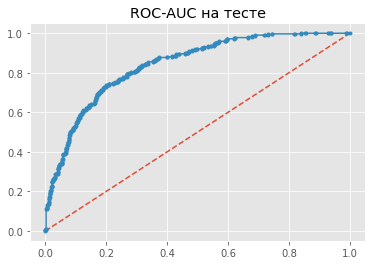

In [98]:
best_rf = RandomForestClassifier(n_estimators = 73, min_samples_split=39, min_samples_leaf=7, 
                              max_features = 'log2', max_depth = 26,
                             random_state=17, oob_score = True).fit(train_x1, train_y1)
probs_train = best_rf.predict_proba(train_x1)[:, 1]
probs_test = best_rf.predict_proba(test_x1)[:, 1]
auc_train = roc_auc_score(train_y1, probs_train)
auc_test = roc_auc_score(test_y1, probs_test)
print("AUC_train: %.3f" % auc_train, "AUC_test: %.3f" % auc_test)
new_row = {'Model': 'RandomForestClassifier on all features', 'Result': auc_test}
df_new = df_new.append(new_row, ignore_index=True)
fpr, tpr, thresholds = roc_curve(test_y1, probs_test)
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("ROC-AUC на тесте")
plt.show()

## XGB на вручную отобранных признаках

AUC_train: 0.980 AUC_test: 0.812


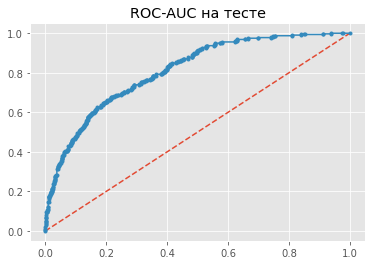

In [99]:
xgb = xgboost.XGBClassifier(objective = "binary:logistic", scale_pos_weight=(y.value_counts()[0]/y.value_counts()[1])).fit(train_x,train_y) 
probs_train = xgb.predict_proba(train_x)[:, 1]
probs_test = xgb.predict_proba(test_x)[:, 1]
auc_train = roc_auc_score(train_y, probs_train)
auc_test = roc_auc_score(test_y, probs_test)
print("AUC_train: %.3f" % auc_train, "AUC_test: %.3f" % auc_test)
fpr, tpr, thresholds = roc_curve(test_y, probs_test)
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("ROC-AUC на тесте")
plt.show()

### feature_importance

In [100]:
f_imp_list = list(zip(train_x.columns, xgb.feature_importances_))
f_imp_list.sort(key = lambda x: x[1], reverse=True)
f_imp_list[:6]

[('Contract_Two year', 0.48781055),
 ('InternetService_Fiber optic', 0.19978647),
 ('Contract_One year', 0.14490432),
 ('InternetService_No', 0.03980772),
 ('tenure_std', 0.023598183),
 ('OnlineSecurity_1', 0.017071951)]

### Тюнинг XGB

In [99]:
parameters = {
              'max_depth': [5, 10, 15, 20, 25],
              'learning_rate': [0.01, 0.05, 0.1, 0.15],
              'n_estimators': [500, 1000, 2000, 3000, 5000],
              'min_child_weight': [1, 5, 15, 200],
              'subsample': [0.6, 0.8, 0.95],
              'colsample_bytree': [0.5, 0.7, 0.9], 
}
xlf = xgboost.XGBClassifier(objective = "binary:logistic", scale_pos_weight=(y.value_counts()[0]/y.value_counts()[1])).fit(train_x,train_y)          
cv = RandomizedSearchCV(estimator = xlf, scoring = "roc_auc", param_distributions=parameters, n_iter = 50, cv=3, n_jobs = -1)
cv.fit(train_x,train_y)    
print(cv.best_params_)
print(cv.best_score_)

{'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 15, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.5}
0.8408568133361353


AUC_train: 0.876 AUC_test: 0.839


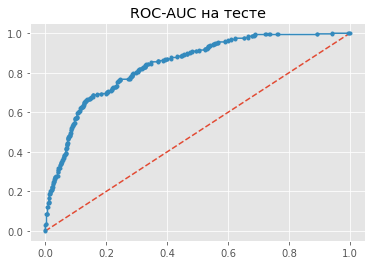

In [101]:
xgb = xgboost.XGBClassifier(objective = "binary:logistic", 
                            scale_pos_weight=(y.value_counts()[0]/y.value_counts()[1]),
                           subsample= 0.8, n_estimators = 500, 
                            min_child_weight = 15, max_depth = 5, 
                            learning_rate = 0.01, 
                            colsample_bytree= 0.5).fit(train_x,train_y) 
probs_train = xgb.predict_proba(train_x)[:, 1]
probs_test = xgb.predict_proba(test_x)[:, 1]
auc_train = roc_auc_score(train_y, probs_train)
auc_test = roc_auc_score(test_y, probs_test)
print("AUC_train: %.3f" % auc_train, "AUC_test: %.3f" % auc_test)
new_row = {'Model': 'XGBClassifier', 'Result': auc_test}
df_new = df_new.append(new_row, ignore_index=True)
fpr, tpr, thresholds = roc_curve(test_y, probs_test)
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("ROC-AUC на тесте")
plt.show()

## XGB на всех признаках

AUC_train: 0.988 AUC_test: 0.811


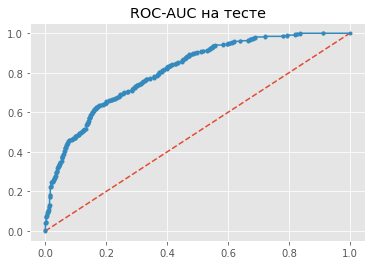

In [102]:
xgb = xgboost.XGBClassifier(objective = "binary:logistic", scale_pos_weight=(y.value_counts()[0]/y.value_counts()[1])).fit(train_x1,train_y1) 
probs_train = xgb.predict_proba(train_x1)[:, 1]
probs_test = xgb.predict_proba(test_x1)[:, 1]
auc_train = roc_auc_score(train_y1, probs_train)
auc_test = roc_auc_score(test_y1, probs_test)
print("AUC_train: %.3f" % auc_train, "AUC_test: %.3f" % auc_test)
fpr, tpr, thresholds = roc_curve(test_y1, probs_test)
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("ROC-AUC на тесте")
plt.show()

### Тюнинг XGB на всех признаках

In [101]:
parameters = {
              'max_depth': [5, 10, 15, 20, 25],
              'learning_rate': [0.01, 0.05, 0.1, 0.15],
              'n_estimators': [500, 1000, 2000, 3000, 5000],
              'min_child_weight': [1, 5, 15, 200],
              'subsample': [0.6, 0.8, 0.95],
              'colsample_bytree': [0.5, 0.7, 0.9], 
}
xlf = xgboost.XGBClassifier(objective = "binary:logistic", scale_pos_weight=(y.value_counts()[0]/y.value_counts()[1])).fit(train_x,train_y)          
cv = RandomizedSearchCV(estimator = xlf, scoring = "roc_auc", param_distributions=parameters, n_iter = 50, cv=3, n_jobs = -1)
cv.fit(train_x1,train_y1)    
print(cv.best_params_)
print(cv.best_score_)

{'subsample': 0.6, 'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.5}
0.8383129900876548


AUC_train: 0.909 AUC_test: 0.832


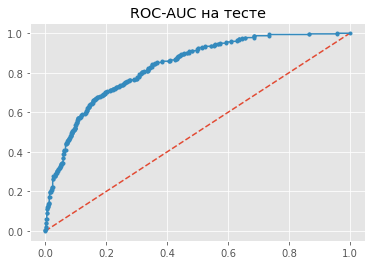

In [103]:
xgb = xgboost.XGBClassifier(objective = "binary:logistic", 
                            scale_pos_weight=(y.value_counts()[0]/y.value_counts()[1]),
                           subsample= 0.6, n_estimators = 1000, 
                            min_child_weight = 1, max_depth = 5, 
                            learning_rate = 0.01, 
                            colsample_bytree= 0.5).fit(train_x,train_y) 
probs_train = xgb.predict_proba(train_x)[:, 1]
probs_test = xgb.predict_proba(test_x)[:, 1]
auc_train = roc_auc_score(train_y, probs_train)
auc_test = roc_auc_score(test_y, probs_test)
print("AUC_train: %.3f" % auc_train, "AUC_test: %.3f" % auc_test)
new_row = {'Model': 'XGBClassifier on all features', 'Result': auc_test}
df_new = df_new.append(new_row, ignore_index=True)
fpr, tpr, thresholds = roc_curve(test_y, probs_test)
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("ROC-AUC на тесте")
plt.show()

## CatBoostClassifier на вручную отобранных признаках

AUC_train: 0.924 AUC_test: 0.830


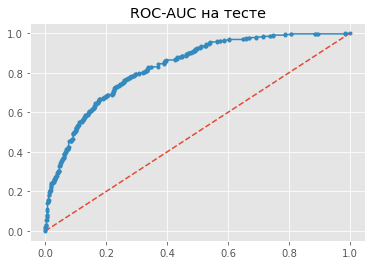

In [104]:
clf_cb = cb.CatBoostClassifier(eval_metric="AUC", logging_level = "Silent"
                              ).fit(train_x,train_y)  
probs_train = clf_cb.predict_proba(train_x)[:, 1]
probs_test = clf_cb.predict_proba(test_x)[:, 1]
auc_train = roc_auc_score(train_y, probs_train)
auc_test = roc_auc_score(test_y, probs_test)
print("AUC_train: %.3f" % auc_train, "AUC_test: %.3f" % auc_test)
fpr, tpr, thresholds = roc_curve(test_y, probs_test)
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("ROC-AUC на тесте")
plt.show()

### feature_importance

In [105]:
f_imp_list = list(zip(train_x.columns, clf_cb.feature_importances_))
f_imp_list.sort(key = lambda x: x[1], reverse=True)
f_imp_list

[('tenure_std', 19.466922541384175),
 ('MonthlyCharges_std', 18.36945971625097),
 ('TotalCharges_std', 18.080095059548427),
 ('Contract_Two year', 8.549428578052819),
 ('InternetService_Fiber optic', 6.409936091013595),
 ('InternetService_No', 4.308595823600679),
 ('Contract_One year', 4.172336492825905),
 ('TechSupport_1', 4.042054202739717),
 ('SeniorCitizen', 3.847120731685502),
 ('OnlineSecurity_1', 3.68015776379086),
 ('PaperlessBilling_Yes', 3.6458543361692257),
 ('Dependents_1', 2.9369028995438096),
 ('Partner_1', 2.491135763394334)]

Text(0, 0.5, 'ROC-AUC')

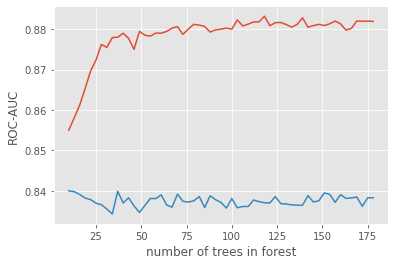

In [106]:
N = []
f_train, f_test = [], []

for n in np.arange(10, 180, 3):
    rf = cb.CatBoostClassifier(logging_level='Silent', n_estimators = n, random_state=17) 
    rf.fit(train_x, train_y)
    pred_train = rf.predict_proba(train_x)[:, 1]
    pred_rf = rf.predict_proba(test_x)[:, 1]
    N.append(n)
    f_train.append(roc_auc_score(train_y,  pred_train))
    f_test.append(roc_auc_score(test_y,  pred_rf))

plt.plot(N, f_train, '-')
plt.plot(N, f_test, '-')
plt.xlabel('number of trees in forest')
plt.ylabel('ROC-AUC')

### Определение оптимального количества деревьев на вручную отобранных признаках

In [107]:
f_imp_list3 = list(zip(N, f_test))
f_imp_list3.sort(key = lambda x: x[1], reverse=True)
f_imp_list3[:15]

[(10, 0.8399861749831665),
 (37, 0.8398697726393604),
 (13, 0.8397641151272903),
 (151, 0.8394632598386842),
 (70, 0.8391570321342101),
 (154, 0.8391212160284237),
 (16, 0.8390871907279265),
 (160, 0.8390263033480895),
 (61, 0.8389940688528817),
 (142, 0.8388006618816348),
 (88, 0.8387558917494019),
 (82, 0.8385714388046016),
 (124, 0.8385678571940229),
 (169, 0.8384263835761665),
 (178, 0.8382705835159956)]

### Тюнинг Catboost на вручную отобранных признаках

In [90]:
parameters = {'depth': [1, 4, 7, 10, 15, 20],
              'learning_rate': [0.03, 0.1, 0.15, 0.3, 0.9],
              'l2_leaf_reg': [1, 3, 5, 7, 9],
              "subsample": [0.3, 0.5, 0.7, 1],
              "random_strength": [1, 2, 5, 10, 20, 50, 100],
              "min_data_in_leaf": [5, 10, 20, 30, 40, 50, 70, 100, 150]}

cb = cb.CatBoostClassifier(logging_level='Silent', n_estimators = 10)
cv = RandomizedSearchCV(estimator = cb, param_distributions=parameters, scoring="roc_auc", n_iter = 70, cv=3, n_jobs = -1)
cv.fit(train_x,train_y)    
print(cv.best_params_)
print(cv.best_score_)

{'subsample': 0.3, 'random_strength': 10, 'min_data_in_leaf': 100, 'learning_rate': 0.3, 'l2_leaf_reg': 3, 'depth': 10}
0.8341191096498132


AUC_train: 0.853 AUC_test: 0.841


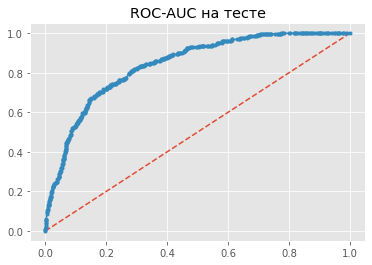

In [108]:
cat_class_1 = cb.CatBoostClassifier(logging_level='Silent', n_estimators = 10)
cat_class_1.fit(train_x, train_y)
probs_train = cat_class_1.predict_proba(train_x)[:, 1]
probs_test = cat_class_1.predict_proba(test_x)[:, 1]
auc_train = roc_auc_score(train_y, probs_train)
auc_test = roc_auc_score(test_y, probs_test)
print("AUC_train: %.3f" % auc_train, "AUC_test: %.3f" % auc_test)
new_row = {'Model': 'CatBoostClassifier', 'Result': auc_test}
df_new = df_new.append(new_row, ignore_index=True)
fpr, tpr, thresholds = roc_curve(test_y, probs_test)
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("ROC-AUC на тесте")
plt.show()

### feature_importance

In [109]:
f_imp_list = list(zip(train_x.columns, cat_class_1.feature_importances_))
f_imp_list.sort(key = lambda x: x[1], reverse=True)
f_imp_list

[('Contract_Two year', 20.847907609146283),
 ('InternetService_Fiber optic', 17.561571415504584),
 ('Contract_One year', 10.19989746437805),
 ('tenure_std', 9.716219058242428),
 ('InternetService_No', 9.429675468115693),
 ('TotalCharges_std', 9.405780183138146),
 ('MonthlyCharges_std', 8.157054952919443),
 ('PaperlessBilling_Yes', 4.712825786883695),
 ('OnlineSecurity_1', 4.184801856155574),
 ('TechSupport_1', 2.5722266840370716),
 ('SeniorCitizen', 2.2441536089456986),
 ('Partner_1', 0.9678859125333314),
 ('Dependents_1', 0.0)]

## CatBoostClassifier на всех признаках

AUC_train: 0.939 AUC_test: 0.832


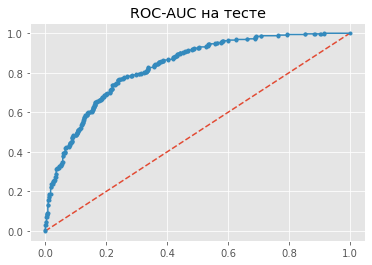

In [110]:
clf_cb = cb.CatBoostClassifier(eval_metric="AUC", logging_level = "Silent"
                              ).fit(train_x1,train_y1)  
probs_train = clf_cb.predict_proba(train_x1)[:, 1]
probs_test = clf_cb.predict_proba(test_x1)[:, 1]
auc_train = roc_auc_score(train_y1, probs_train)
auc_test = roc_auc_score(test_y1, probs_test)
print("AUC_train: %.3f" % auc_train, "AUC_test: %.3f" % auc_test)
fpr, tpr, thresholds = roc_curve(test_y1, probs_test)
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("ROC-AUC на тесте")
plt.show()

Text(0, 0.5, 'ROC-AUC')

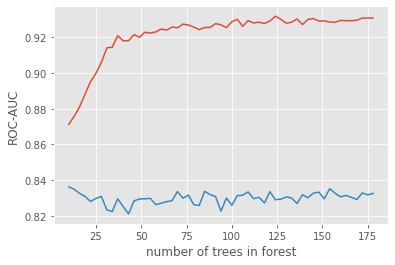

In [111]:
N = []
f_train, f_test = [], []

for n in np.arange(10, 180, 3):
    rf = cb.CatBoostClassifier(logging_level='Silent', n_estimators = n, random_state=17) 
    rf.fit(train_x1, train_y1)
    pred_train = rf.predict_proba(train_x1)[:, 1]
    pred_rf = rf.predict_proba(test_x1)[:, 1]
    N.append(n)
    f_train.append(roc_auc_score(train_y1,  pred_train))
    f_test.append(roc_auc_score(test_y1,  pred_rf))

plt.plot(N, f_train, '-')
plt.plot(N, f_test, '-')
plt.xlabel('number of trees in forest')
plt.ylabel('ROC-AUC')

### Определение оптимального количества деревьев на всех признаках

In [112]:
f_imp_list20 = list(zip(N, f_test))
f_imp_list20.sort(key = lambda x: x[1], reverse=True)
f_imp_list20[:15]

[(10, 0.8363311413876591),
 (154, 0.8352906835145628),
 (13, 0.8349128235985157),
 (85, 0.833847294451369),
 (70, 0.8337111932493804),
 (121, 0.8335643472156559),
 (109, 0.8334694345353219),
 (148, 0.8333297517227548),
 (172, 0.832853397515795),
 (145, 0.8328139997994298),
 (157, 0.832715505508517),
 (178, 0.8326420824916548),
 (16, 0.832615220412315),
 (88, 0.8319579948711336),
 (139, 0.8318827810489821)]

In [ ]:
parameters = {'depth': [1, 4, 7, 10, 15, 20],
              'learning_rate': [0.03, 0.1, 0.15, 0.3, 0.9],
              'l2_leaf_reg': [1, 3, 5, 7, 9],
              "subsample": [0.3, 0.5, 0.7, 1],
              "random_strength": [1, 2, 5, 10, 20, 50, 100],
              "min_data_in_leaf": [5, 10, 20, 30, 40, 50, 70, 100, 150]}

cb = cb.CatBoostClassifier(logging_level='Silent', n_estimators = 10)
cv = RandomizedSearchCV(estimator = cb, param_distributions=parameters, scoring="roc_auc", n_iter = 70, cv=3, n_jobs = -1)
cv.fit(train_x1,train_y1)    
print(cv.best_params_)
print(cv.best_score_)

AUC_train: 0.869 AUC_test: 0.834


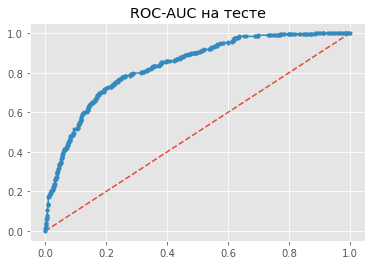

In [113]:
cat_class_2 = cb.CatBoostClassifier(logging_level='Silent', n_estimators = 10)
cat_class_2.fit(train_x1, train_y1)
probs_train = cat_class_2.predict_proba(train_x1)[:, 1]
probs_test = cat_class_2.predict_proba(test_x1)[:, 1]
auc_train = roc_auc_score(train_y1, probs_train)
auc_test = roc_auc_score(test_y1, probs_test)
print("AUC_train: %.3f" % auc_train, "AUC_test: %.3f" % auc_test)
new_row = {'Model': 'CatBoostClassifier on all features', 'Result': auc_test}
df_new = df_new.append(new_row, ignore_index=True)
fpr, tpr, thresholds = roc_curve(test_y1, probs_test)
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(fpr, tpr, marker = ".")
plt.title("ROC-AUC на тесте")
plt.show()

In [114]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

class DjStacking(BaseEstimator, ClassifierMixin):  
    """Стэкинг моделей scikit-learn"""

    def __init__(self, models, ens_model):
        """
        Инициализация
        models - базовые модели для стекинга
        ens_model - мета-модель
        """
        self.models = models
        self.ens_model = ens_model
        self.n = len(models)
        self.valid = None
        
    def fit(self, X, y=None, p=0.25, cv=3, err=0.001, random_state=None):
        """
        Обучение стекинга
        p - в каком отношении делить на обучение / тест
            если p = 0 - используем всё обучение!
        cv  (при p=0) - сколько фолдов использовать
        err (при p=0) - величина случайной добавки к метапризнакам
        random_state - инициализация генератора
            
        """
        if (p > 0): # делим на обучение и тест
            # разбиение на обучение моделей и метамодели
            train, valid, y_train, y_valid = train_test_split(X, y, test_size=p, random_state=random_state)
            
            # заполнение матрицы для обучения метамодели
            self.valid = np.zeros((valid.shape[0], self.n))
            for t, clf in enumerate(self.models):
                clf.fit(train, y_train)
                self.valid[:, t] = clf.predict(valid)
                
            # обучение метамодели
            self.ens_model.fit(self.valid, y_valid)
            
        else: # используем всё обучение
            
            # для регуляризации - берём случайные добавки
            self.valid = err*np.random.randn(X.shape[0], self.n)
            
            for t, clf in enumerate(self.models):
                # это oob-ответы алгоритмов
                self.valid[:, t] += cross_val_predict(clf, X, y, cv=cv, n_jobs=-1, method='predict')
                # но сам алгоритм надо настроить
                clf.fit(X, y)
            
            # обучение метамодели
            self.ens_model.fit(self.valid, y)  
            

        return self

    def predict(self, X, y=None):
        """
        Работа стэкинга
        """
        # заполение матрицы для мета-классификатора
        X_meta = np.zeros((X.shape[0], self.n))
        
        for t, clf in enumerate(self.models):
            X_meta[:, t] = clf.predict_proba(X)[:, 1]
    
        a = self.ens_model.predict_proba(X_meta)[:, 1]
        
        return (a)

## Stacking1 на вручную отобранных признаках

In [115]:
ada=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
gbdt = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, 
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, 
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
svmodel = SVC(kernel="linear", probability=True)
mlp = MLPClassifier(random_state=42)
best_rf = RandomForestClassifier(n_estimators = 175, min_samples_split=44, min_samples_leaf=18, 
                              max_features = 'sqrt', max_depth = 42,
                             random_state=17, oob_score = True)
xgb = xgboost.XGBClassifier(objective = "binary:logistic", 
                            scale_pos_weight=(y.value_counts()[0]/y.value_counts()[1]),
                           subsample= 0.8, n_estimators = 500, 
                            min_child_weight = 15, max_depth = 5, 
                            learning_rate = 0.01, 
                            colsample_bytree= 0.5)
cat_class_1 = cb.CatBoostClassifier(logging_level='Silent', n_estimators = 10)
models = [ada, gbdt, svmodel, mlp, best_rf, xgb, cat_class_1]
ens_model = LogisticRegression(random_state = 42)
s1 = DjStacking(models, ens_model)
a = 0
e = []
for t in range(2, 11):
    s1.fit(train_x, train_y, p=-1, cv=t, err=0.00)
    a = s1.predict(test_x, train_y)
    rc = roc_auc_score(test_y, a)
    print("Количество фолдов:", t, "ROC-AUC:", rc)
    e.append((t, rc))

Количество фолдов: 2 ROC-AUC: 0.8390961447543732
Количество фолдов: 3 ROC-AUC: 0.8393826736006647
Количество фолдов: 4 ROC-AUC: 0.8393540207160356
Количество фолдов: 5 ROC-AUC: 0.8402386785289608
Количество фолдов: 6 ROC-AUC: 0.8400345267259782
Количество фолдов: 7 ROC-AUC: 0.8401491382644948
Количество фолдов: 8 ROC-AUC: 0.8398267933124167
Количество фолдов: 9 ROC-AUC: 0.8397050185527427
Количество фолдов: 10 ROC-AUC: 0.8401204853798656


## Stacking1 на всех признаках

In [116]:
ada=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
gbdt = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, 
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, 
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
svmodel = SVC(kernel="linear", probability=True)
mlp = MLPClassifier(random_state=42)
best_rf = RandomForestClassifier(n_estimators = 175, min_samples_split=44, min_samples_leaf=18, 
                              max_features = 'sqrt', max_depth = 42,
                             random_state=17, oob_score = True)
xgb = xgboost.XGBClassifier(objective = "binary:logistic", 
                            scale_pos_weight=(y.value_counts()[0]/y.value_counts()[1]),
                           subsample= 0.6, n_estimators = 1000, 
                            min_child_weight = 1, max_depth = 5, 
                            learning_rate = 0.01, 
                            colsample_bytree= 0.5)
cat_class_1 = cb.CatBoostClassifier(logging_level='Silent', n_estimators = 10)
models = [ada, gbdt, svmodel, mlp, best_rf, xgb, cat_class_1]
ens_model = LogisticRegression(random_state = 42)
s1 = DjStacking(models, ens_model)
a = 0
e = []
for t in range(2, 11):
    s1.fit(train_x1, train_y1, p=-1, cv=t, err=0.00)
    a = s1.predict(test_x1, train_y1)
    rc = roc_auc_score(test_y, a)
    print("Количество фолдов:", t, "ROC-AUC:", rc)
    e.append((t, rc))

Количество фолдов: 2 ROC-AUC: 0.8369041990802424
Количество фолдов: 3 ROC-AUC: 0.8367251185513102
Количество фолдов: 4 ROC-AUC: 0.8370009025658658
Количество фолдов: 5 ROC-AUC: 0.8367000472772597
Количество фолдов: 6 ROC-AUC: 0.8373411555708371
Количество фолдов: 7 ROC-AUC: 0.8371549118207475
Количество фолдов: 8 ROC-AUC: 0.8367036288878383
Количество фолдов: 9 ROC-AUC: 0.8370653715562814
Количество фолдов: 10 ROC-AUC: 0.8363562126617097


## Stacking не помог

## VotingClassifier на вручную отобранных признаков

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
dt_lr = LogisticRegression(C=3237.45754281764, penalty ='l2', random_state=42) 
dt_ada = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)
dt_grad = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, 
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, 
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
dt_rf = RandomForestClassifier(n_estimators = 175, min_samples_split=44, min_samples_leaf=18, 
                              max_features = 'sqrt', max_depth = 42,
                             random_state=17, oob_score = True)
dt_xgb = xgboost.XGBClassifier(objective = "binary:logistic", 
                            scale_pos_weight=(y.value_counts()[0]/y.value_counts()[1]),
                           subsample= 0.8, n_estimators = 500, 
                            min_child_weight = 15, max_depth = 5, 
                            learning_rate = 0.01, 
                            colsample_bytree= 0.5)
dt_clf = cb.CatBoostClassifier(logging_level='Silent', n_estimators = 10)    

classifiers =[dt_lr, dt_ada, dt_grad, dt_rf, dt_xgb, dt_clf]
for clf in classifiers:
    clf_scores = cross_val_score(clf, train_x, train_y, cv = 10)
    bagging_clf = BaggingClassifier(clf, max_samples=0.4, max_features=10, random_state=0)
    bagging_clf_scores = cross_val_score(bagging_clf, train_x, train_y, cv = 10)
    print(clf.__class__.__name__, ":::: Mean:", clf_scores.mean(), ", Std Dev:", clf_scores.std())
    print("Bagging", clf.__class__.__name__, ":::: Mean:", bagging_clf_scores.mean(), "Std Dev:", bagging_clf_scores.std(), "\n")

ensembler = VotingClassifier(estimators=[('LogisticRegression', dt_lr), ('AdaBoostClassifier', dt_ada),
                                        ('RandomForestClassifier', dt_rf), ('XGBClassifier', dt_xgb),
                                        ('CatBoostClassifier', dt_clf)], voting = 'hard')


ensembler_scores = cross_val_score(ensembler, train_x, train_y, cv = 10)
print(ensembler.__class__.__name__, ":::: Mean:", ensembler_scores.mean(), "Std Dev:", clf_scores.std())

LogisticRegression :::: Mean: 0.7947698744769875 , Std Dev: 0.015127996811540508
Bagging LogisticRegression :::: Mean: 0.7922594142259415 Std Dev: 0.014404794966612572 

AdaBoostClassifier :::: Mean: 0.7947698744769874 , Std Dev: 0.014747099203830221
Bagging AdaBoostClassifier :::: Mean: 0.7993723849372385 Std Dev: 0.016774277226277078 

GradientBoostingClassifier :::: Mean: 0.8010460251046025 , Std Dev: 0.016800348546371427
Bagging GradientBoostingClassifier :::: Mean: 0.797907949790795 Std Dev: 0.01621035198979959 

RandomForestClassifier :::: Mean: 0.798326359832636 , Std Dev: 0.01947293100957337
Bagging RandomForestClassifier :::: Mean: 0.7960251046025104 Std Dev: 0.015122209513390128 

XGBClassifier :::: Mean: 0.7502092050209205 , Std Dev: 0.016317991631799176
Bagging XGBClassifier :::: Mean: 0.752928870292887 Std Dev: 0.017161188732063466 

CatBoostClassifier :::: Mean: 0.8006276150627615 , Std Dev: 0.02030582342267394
Bagging CatBoostClassifier :::: Mean: 0.797071129707113 Std D

## VotingClassifier на всех признаках

In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
dt_lr = LogisticRegression(C=16.768329368110066, penalty ='l2', random_state=42) 
dt_ada = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)
dt_grad = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, 
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, 
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
dt_rf = RandomForestClassifier(n_estimators = 73, min_samples_split=39, min_samples_leaf=7, 
                              max_features = 'log2', max_depth = 26,
                             random_state=17, oob_score = True)
dt_xgb = xgboost.XGBClassifier(objective = "binary:logistic", 
                            scale_pos_weight=(y.value_counts()[0]/y.value_counts()[1]),
                           subsample= 0.6, n_estimators = 1000, 
                            min_child_weight = 1, max_depth = 5, 
                            learning_rate = 0.01, 
                            colsample_bytree= 0.5)
dt_clf = cb.CatBoostClassifier(logging_level='Silent', n_estimators = 10)    

classifiers =[dt_lr, dt_ada, dt_grad, dt_rf, dt_xgb, dt_clf]
for clf in classifiers:
    clf_scores = cross_val_score(clf, train_x, train_y, cv = 10)
    bagging_clf = BaggingClassifier(clf, max_samples=0.4, max_features=10, random_state=0)
    bagging_clf_scores = cross_val_score(bagging_clf, train_x, train_y, cv = 10)
    print(clf.__class__.__name__, ":::: Mean:", clf_scores.mean(), ", Std Dev:", clf_scores.std())
    print("Bagging", clf.__class__.__name__, ":::: Mean:", bagging_clf_scores.mean(), "Std Dev:", bagging_clf_scores.std(), "\n")

ensembler = VotingClassifier(estimators=[('LogisticRegression', dt_lr), ('AdaBoostClassifier', dt_ada),
                                        ('RandomForestClassifier', dt_rf), ('XGBClassifier', dt_xgb),
                                        ('CatBoostClassifier', dt_clf)], voting = 'hard')


ensembler_scores = cross_val_score(ensembler, train_x1, train_y1, cv = 10)
print(ensembler.__class__.__name__, ":::: Mean:", ensembler_scores.mean(), "Std Dev:", clf_scores.std())

LogisticRegression :::: Mean: 0.794560669456067 , Std Dev: 0.015051134517661035
Bagging LogisticRegression :::: Mean: 0.792050209205021 Std Dev: 0.014102342716613168 

AdaBoostClassifier :::: Mean: 0.7947698744769874 , Std Dev: 0.014747099203830221
Bagging AdaBoostClassifier :::: Mean: 0.7993723849372385 Std Dev: 0.016774277226277078 

GradientBoostingClassifier :::: Mean: 0.8010460251046025 , Std Dev: 0.016800348546371427
Bagging GradientBoostingClassifier :::: Mean: 0.797907949790795 Std Dev: 0.01621035198979959 

RandomForestClassifier :::: Mean: 0.7991631799163179 , Std Dev: 0.017047321161057217
Bagging RandomForestClassifier :::: Mean: 0.797907949790795 Std Dev: 0.015236101636847807 

XGBClassifier :::: Mean: 0.7518828451882845 , Std Dev: 0.021359412582594516
Bagging XGBClassifier :::: Mean: 0.7707112970711296 Std Dev: 0.017558272182725754 

CatBoostClassifier :::: Mean: 0.8006276150627615 , Std Dev: 0.02030582342267394
Bagging CatBoostClassifier :::: Mean: 0.797071129707113 Std D

## VotingClassifier не помог

## Сравнение качества моделей

In [119]:
df_new = df_new.sort_values(by=['Result'], ascending=False, ignore_index=True)
df_new

,Model,Result
0,GradientBoostingClassifier on all features,0.842185
1,RandomForestClassifier on all features,0.842135
2,CatBoostClassifier,0.841367
3,GradientBoostingClassifier,0.840814
4,XGBClassifier,0.83947
5,RandomForestClassifier,0.838475
6,LogisticRegression,0.836714
7,CatBoostClassifier on all features,0.833591
8,XGBClassifier on all features,0.832227
9,AdaBoostClassifier,0.832139
